<a href="https://colab.research.google.com/github/Shivesh-1999/Business-Analysis-Project/blob/main/Copy_of_Clustering_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Clustering is an unsupervised machine learning technique designed to group unlabeled examples based on their similarity to each other.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
beer_df = pd.read_csv('/content/beer.csv')

In [ ]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


In [ ]:
beer_df = beer_df.drop(2, axis = 0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

### Normalizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_cols = ['calories', 'sodium', 'alcohol', 'cost']

In [ ]:
X_scaled_df = scaler.fit_transform(beer_df[x_cols])

In [ ]:
X_scaled_df

array([[ 0.51216342, -0.05999584,  0.43766186, -0.37979875],
       [ 0.75295667,  0.5571042 ,  0.70470977, -0.37979875],
       [ 0.7873557 , -0.67709588,  0.83823373,  2.09293356],
       [ 0.54656245,  1.17420424,  0.3041379 , -1.47071007],
       [ 1.57853352,  1.32847925,  1.50585351, -0.59798102],
       [ 0.6841586 ,  1.79130428,  0.43766186, -0.45252618],
       [-1.03579318, -0.83137089, -0.09643397, -0.37979875],
       [-0.55420668, -1.13992091, -0.89757771, -0.59798102],
       [ 0.37456728,  0.40282919,  0.3041379 , -0.30707133],
       [-0.93259607, -0.05999584, -0.36348188, -0.16161649],
       [ 0.2025721 , -0.67709588, -0.22995792,  0.12929319],
       [ 0.71855763,  0.5571042 ,  0.43766186,  2.02020614],
       [ 0.6841586 , -1.44847093,  0.83823373,  2.23838841],
       [-2.10216328, -0.05999584, -2.76691309, -0.74343586],
       [ 0.34016824,  0.5571042 ,  0.03708999, -0.37979875],
       [ 0.51216342,  1.32847925,  0.70470977, -0.37979875],
       [-1.96456714, -1.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

## Creating Clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(4, random_state = 100)

In [ ]:
kmeans.fit(X_scaled_df)

KMeans(n_clusters=4, random_state=100)

In [ ]:
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 3, 1, 1, 3, 0], dtype=int32)

In [ ]:
beer_df['cluster_id'] = kmeans.labels_

In [ ]:
beer_df.sort_values('cluster_id')

,name,calories,sodium,alcohol,cost,cluster_id
7,Miller_Lite,99,10,4.3,0.43,0
8,Budweiser_Light,113,8,3.7,0.40,0
11,Michelob_Light,135,11,4.2,0.50,0
10,Coors_Light,102,15,4.1,0.46,0
18,Schlitz_Light,97,7,4.2,0.47,0
6,Srohs_Bohemian_Style,149,27,4.7,0.42,1
0,Budweiser,144,15,4.7,0.43,1
4,Old_Milwaukee,145,23,4.6,0.28,1
15,Hamms,139,19,4.4,0.43,1
5,Augsberger,175,24,5.5,0.40,1


In [ ]:
beer_df[beer_df.cluster_id == 1][x_cols].mean()

,0
calories,148.3750
sodium,21.1250
alcohol,4.7875
cost,0.4075


In [ ]:
beer_df[beer_df.cluster_id == 1][x_cols].std()

,0
calories,11.488348
sodium,3.979860
alcohol,0.331393
cost,0.052847


In [ ]:
beer_df[beer_df.cluster_id == 3][x_cols].mean()

,0
calories,70.00
sodium,10.50
alcohol,2.60
cost,0.42


In [ ]:
beer_df[beer_df.cluster_id == 3][x_cols].std()

,0
calories,2.828427
sodium,6.363961
alcohol,0.424264
cost,0.056569


## Finding Number of Clusters

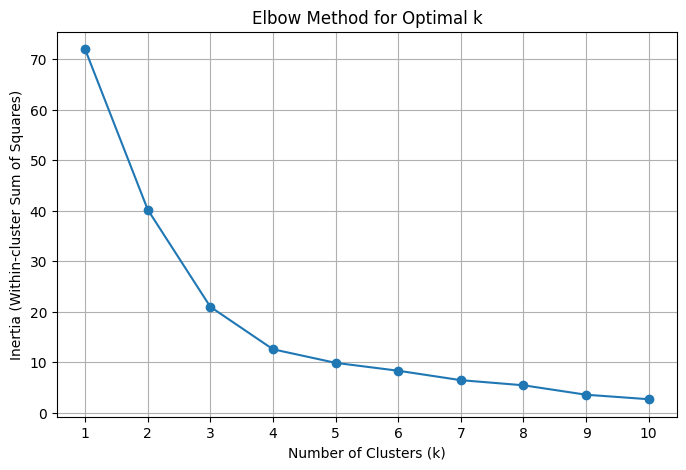

In [ ]:
# Step 2: Compute inertia for different values of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()